**Description :**

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Background of the Problem Statement :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

**Domain : Finance and Housing**

**Dataset Description :**

Data Dictionary – Variable and Description

    ●	longitude (signed numeric - float) : Longitude value for the block in California, USA
    ●	latitude (numeric - float ) : Latitude value for the block in California, USA
    ●	housing_median_age (numeric - int ) : Median age of the house in the block
    ●	total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
    ●	total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block
    ●	population (numeric - int ) : Count of the total number of population in the block
    ●	households (numeric - int ) : Count of the total number of households in the block
    ●	median_income (numeric - float ) : Median of the total household income of all the houses in the block
    ●	ocean_proximity (numeric - categorical ) : Type of the landscape of the block[ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
    ●	median_house_value (numeric - int ) : Median of the household prices of all the houses in the block
    
**Questions to be answered with analysis :**

    1. Build a model of housing prices to predict median house values in California using the provided dataset.
    2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
    3. Predict housing prices based on median_income and plot the regression chart for it.

**Project Guidelines :**

    1. Load the data :
        ●	Read the “housing.csv” file from the folder into the program.
        ●	Print first few rows of this data.
        ●	Extract input (X) and output (Y) data from the dataset.

    2. Handle missing values :
        ●	Fill the missing values with the mean of the respective column.

    3. Encode categorical data :
        ●	Convert categorical column in the dataset to numerical data.

    4. Split the dataset : 
        ●	Split the data into 80% training dataset and 20% test dataset.

    5. Standardize data :
        ●	Standardize training and test datasets.

    6. Perform Linear Regression : 
        ●	Perform Linear Regression on training data.
        ●	Predict output for test dataset using the fitted model.
        ●	Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

    7. Perform Decision Tree Regression :
        ●	Perform Decision Tree Regression on training data.
        ●	Predict output for test dataset using the fitted model.
        ●	Print root mean squared error from Decision Tree Regression.

    8. Perform Random Forest Regression :
        ●	Perform Random Forest Regression on training data.
        ●	Predict output for test dataset using the fitted model.
        ●	Print RMSE (root mean squared error) from Random Forest Regression.

    9. Bonus exercise: Perform Linear Regression with one independent variable :
        ●	Extract just the median_income column from the independent variables (from X_train and X_test).
        ●	Perform Linear Regression to predict housing values based on median_income.
        ●	Predict output for test dataset using the fitted model.
        ●	Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [1]:
## Import the necessary basic libraries

import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import descartes
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon

%matplotlib inline

#### 1. Load the data :

In [2]:
price_df = pd.read_csv('housing.csv')
price_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
X_features = price_df.drop('median_house_value', axis=1)
Y_target = price_df['median_house_value']

#### 2. Handle missing values :

In [4]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


**Summary**
- There are 20640 rows, with 10 Columns
- Data types: float64(4), int64(5), object(1)
- Column 'total_bedrooms' has missing some missing values

In [5]:
price_df.describe().T.drop(['count'], axis=1)

,mean,std,min,25%,50%,75%,max
longitude,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [6]:
# Checking for nulls

price_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
# Fill the missing values with the KNN Imputer

price_df['total_bedrooms'].fillna(value = price_df.total_bedrooms.mean(), inplace=True)
price_df['total_bedrooms'].isnull().sum()

0

#### 3. Encode categorical data :

In [8]:
# Checking data type of 'object'

price_df.select_dtypes('object').head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df_col=list(price_df.select_dtypes('object'))

for i in range(len(df_col)):
    le = LabelEncoder()
    price_df[df_col[i]] = le.fit_transform(price_df[df_col[i]])

In [11]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  int32  
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int32(1), int64(5)
memory usage: 1.5 MB


In [12]:
## Lets check for skewness
X_features.skew(axis=0)

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
dtype: float64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>, <AxesSubplot:>]],
      dtype=object)

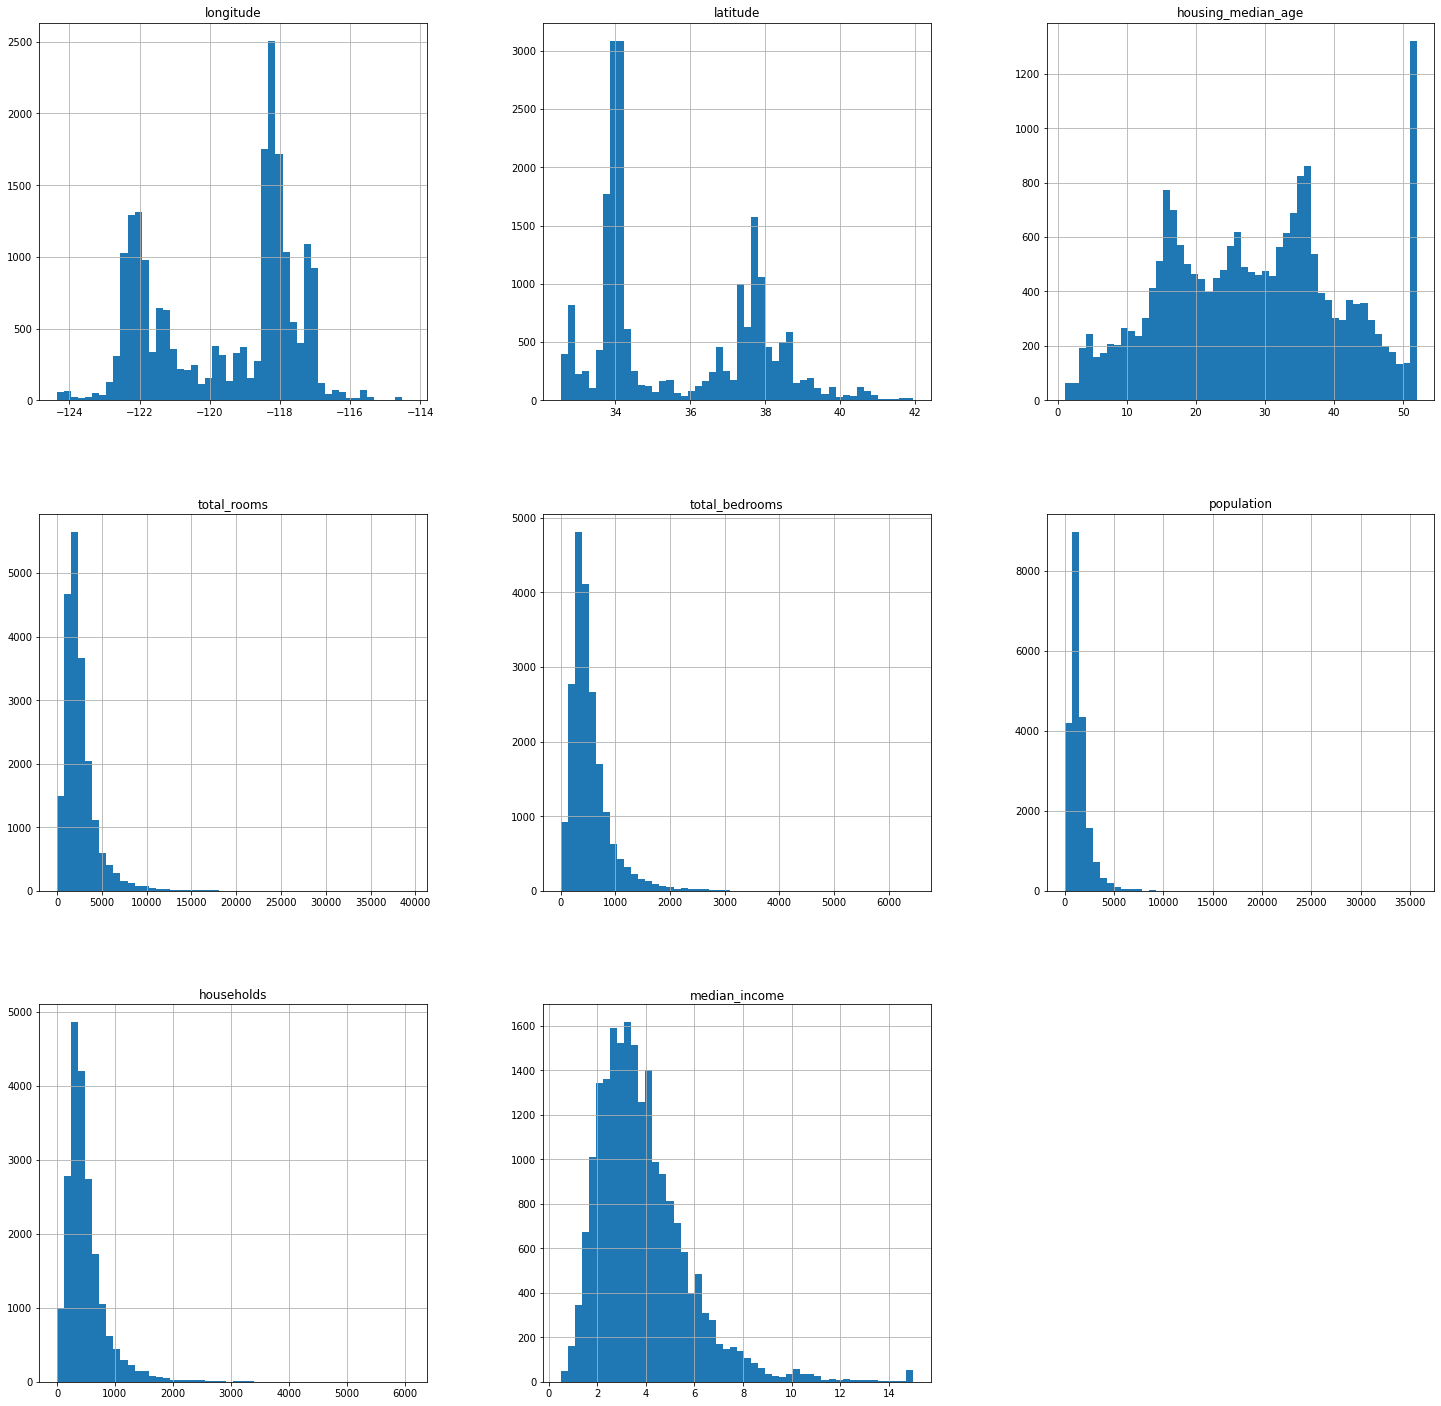

In [13]:
## To visualize data distribution, lets plot some histograms
X_features.hist(figsize=(25,25), bins=50)

**Observations:**
- There are some skewness in data plus outliers.

(-100.0, 9000.0)

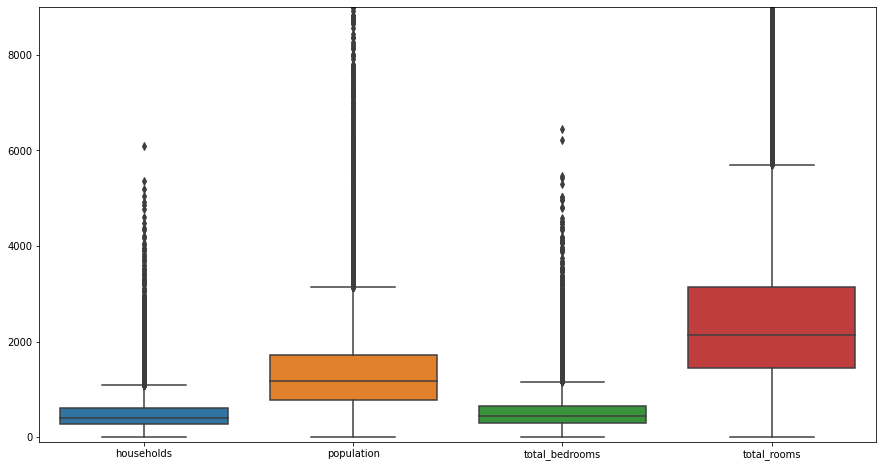

In [14]:
## Lets check for outliers

columns = ['households', 'population', 'total_bedrooms', 'total_rooms']
plt.figure(figsize=(15, 8))
sns.boxplot(data=price_df[columns])
plt.ylim((-100, 9000))

In [15]:
# Lets create map with latitudes and longitudes given in the data set with respect to median_house_value

us_map = gpd.read_file(r'C:\Users\Nima\Downloads\states_21basic\states.shp')  

In [16]:
img = mpimg.imread('map_ca.png')

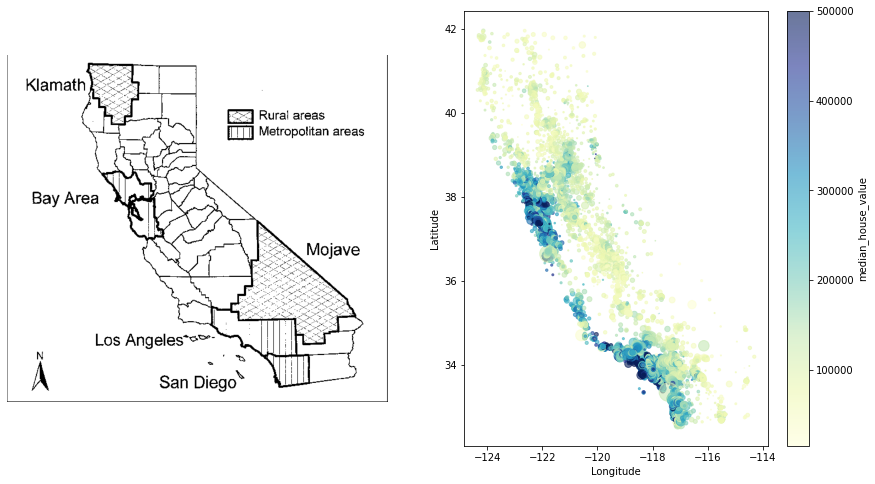

In [17]:
# Creating axes and plotting world map

fig, ax = plt.subplots(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
us_map[us_map.STATE_NAME == 'California'].plot(color="lightgrey", ax=ax)

# Plotting our median_house_value with a color map
plt.subplot(1, 2, 2)
x = price_df['longitude']
y = price_df['latitude']
z = price_df['median_house_value']
plt.scatter(x, y, s=price_df["population"]/100, c=z, alpha=0.6,cmap="YlGnBu")
plt.colorbar(label='median_house_value')
plt.xlabel("Longitude")
plt.ylabel("Latitude")



plt.show()

**Observations:**
1. The density of occupancy can be observed for different areas in the state of California. Population is high in metropolitan areas like Los Angeles, San DiegoBay and Bay Area.
2. The price varies in the similar manner, whereby in the urban areas and coincidentally located along the coast too, the median house value is above USD 500000.
3. The house price decreases as we move away from the coastline and inwards.

In [18]:
# Lets investigate features, if we can create new features or drop redundant features
# Creating new features:

price_df['rooms_per_household'] = price_df['total_rooms']/price_df['households']
price_df['bedrooms_per_household'] = price_df['total_bedrooms']/price_df['households']
price_df['population_per_household'] = price_df['population']/price_df['households']

df = price_df[['rooms_per_household','bedrooms_per_household','population_per_household','median_house_value']]
df.describe().drop('count', axis=0)

,rooms_per_household,bedrooms_per_household,population_per_household,median_house_value
mean,5.429000,1.104422,3.070655,206855.816909
std,2.474173,0.544522,10.386050,115395.615874
min,0.846154,0.149866,0.692308,14999.000000
25%,4.440716,1.005857,2.429741,119600.000000
50%,5.229129,1.049084,2.818116,179700.000000
75%,6.052381,1.100398,3.282261,264725.000000
max,141.909091,34.066667,1243.333333,500001.000000


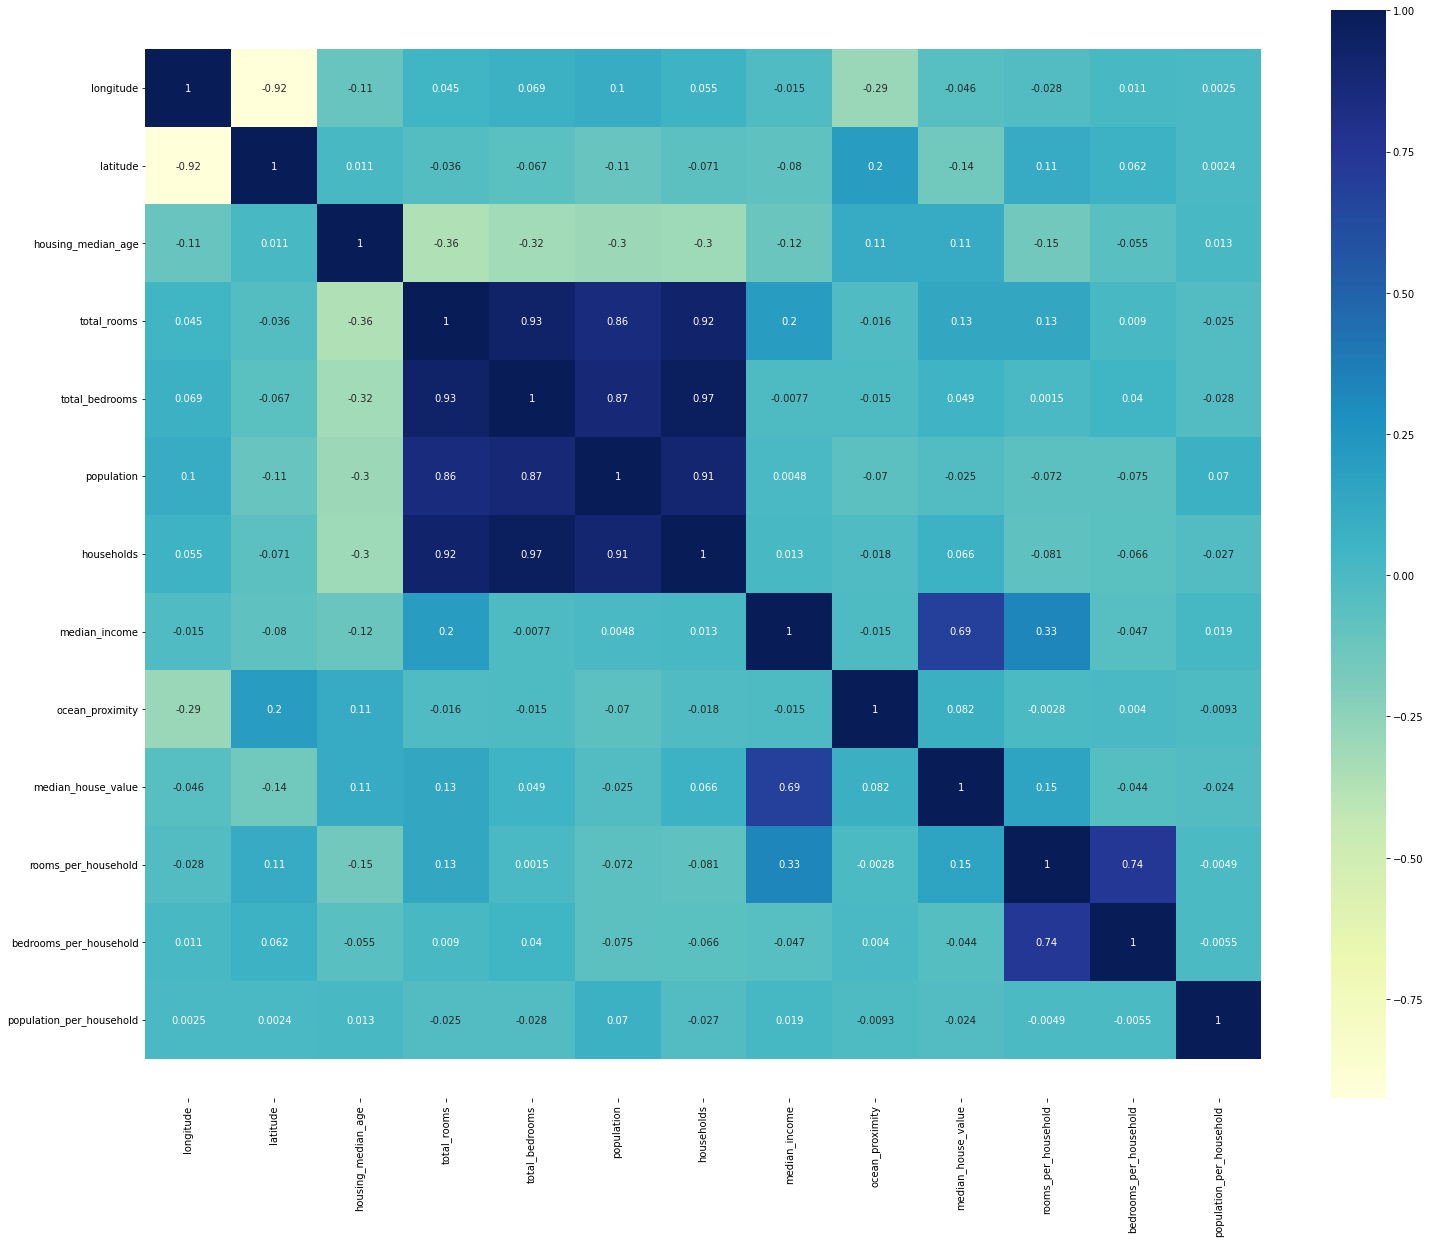

In [19]:
plt.figure(figsize=(25,20))
corre=price_df.corr()
ax=sns.heatmap(corre,annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 
plt.show()

**Degree of correlation:**

- Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
- Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
- Low degree: When the value lies below + .29, then it is said to be a small correlation.
- No correlation: When the value is zero.

In [20]:
print(corre["median_house_value"])

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049454
population                 -0.024650
households                  0.065843
median_income               0.688075
ocean_proximity             0.081750
median_house_value          1.000000
rooms_per_household         0.151948
bedrooms_per_household     -0.044265
population_per_household   -0.023737
Name: median_house_value, dtype: float64


In [21]:
#g = sns.pairplot(price_df, hue='median_house_value')
#g.fig.set_size_inches(20,10)
#plt.show()

In [22]:
#from autoviz.AutoViz_Class import AutoViz_Class
#AV = AutoViz_Class()

#filename = ""
#sep = ","
#dft = AV.AutoViz(filename,sep=",",depVar="median_house_value",dfte=df,header=0,verbose=0,lowess=True,chart_format="svg",)

### 4. Split the dataset 

In [23]:
X_features = price_df.drop('median_house_value', axis=1)
print('X_features dataframe:{}'.format(X_features.shape))
Y_target = price_df['median_house_value'].values
print('Y_target dataframe:{}'.format(Y_target.shape))

X_features dataframe:(20640, 12)
Y_target dataframe:(20640,)


In [24]:
#### Feature Elimination using RFR

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

#create model
rf = RandomForestRegressor(n_estimators=150)

#fit the model
rf.fit(X_features, Y_target)

RandomForestRegressor(n_estimators=150)

(-1.0, 10.0)

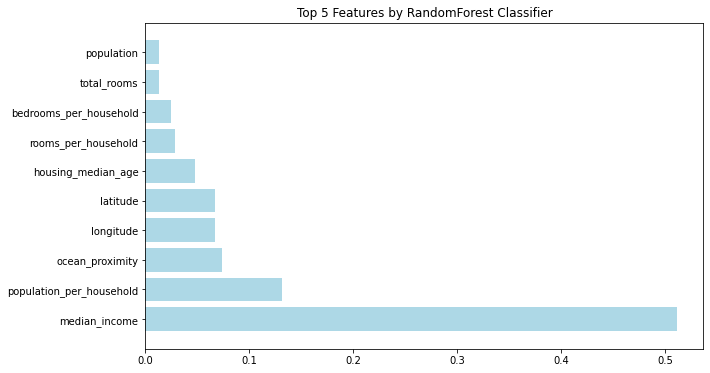

In [25]:
feat_names = X_features.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]

# Visualize feature importance
plt.subplots(figsize=(10,6))
plt.title("Top 5 Features by RandomForest Classifier")
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")
plt.yticks(range(len(indices)), feat_names[indices], rotation='horizontal')
plt.ylim([-1, len(indices)])

In [26]:
# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(Y_train.shape,Y_train.size))
print("y_test shape {} and size {}".format(Y_test.shape,Y_test.size))

X_train shape (16512, 12) and size 198144
X_test shape (4128, 12) and size 49536
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


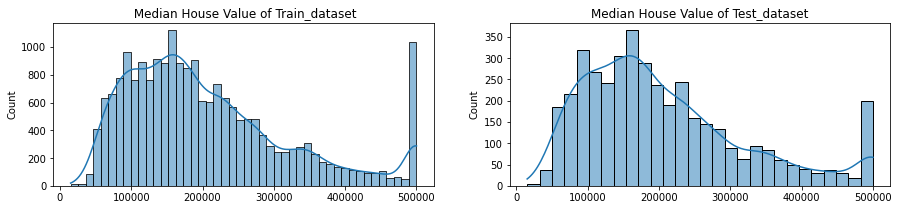

In [27]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.histplot(Y_target, kde=True)
plt.title(" Median House Value of Train_dataset")

plt.subplot(1,2,2)
sns.histplot(Y_test, kde=True)
plt.title("Median House Value of Test_dataset")

plt.show()

### 5. Standardize data

In [28]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

### 6. Perform Linear Regression : 

In [29]:
from sklearn.linear_model import LinearRegression

# create a model object
linreg = LinearRegression()
# fit the model 
linreg.fit(X_train_sd, Y_train)

LinearRegression()

In [30]:
print("Intercept is {} ".format(linreg.intercept_))
print("coefficients  is {} ".format(linreg.coef_))

Intercept is 207194.69373788778 
coefficients  is [-85549.21844935 -90440.9996632   14881.75311403  -6407.01678493
  17548.16557514 -45176.76204512  38894.35783529  81196.37183242
   -518.64223014 -15770.58297469  20939.10290876    625.42558343] 


In [31]:
y_pred = linreg.predict(X_test_sd)
y_pred

array([ 74754.93737387, 167746.63879818, 291590.2820616 , ...,
       452821.26678687, 130587.7501989 , 180311.05597187])

In [32]:
lr_comparison_df = pd.DataFrame({'y_pred':y_pred, 'y_actual':Y_test})
lr_comparison_df

,y_pred,y_actual
0,74754.937374,47700
1,167746.638798,45800
2,291590.282062,500001
3,278828.620126,218600
4,278153.107938,278000
...,...,...
4123,205416.618266,263300
4124,243317.134061,266800
4125,452821.266787,500001
4126,130587.750199,72300


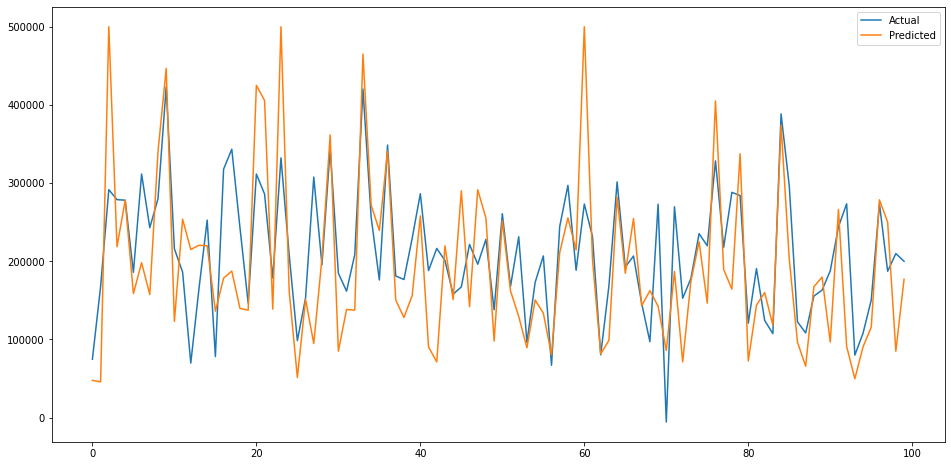

In [33]:
fig= plt.figure(figsize=(16,8))
lr_comparison_df = lr_comparison_df.reset_index()
lr_comparison_df = lr_comparison_df.drop(['index'],axis=1)
plt.plot(lr_comparison_df[:100])
plt.legend(['Actual','Predicted'])
#sns.jointplot(x='Y_test',y='y_pred',data=lr_comparison_df,kind='reg')

In [34]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

In [35]:
# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

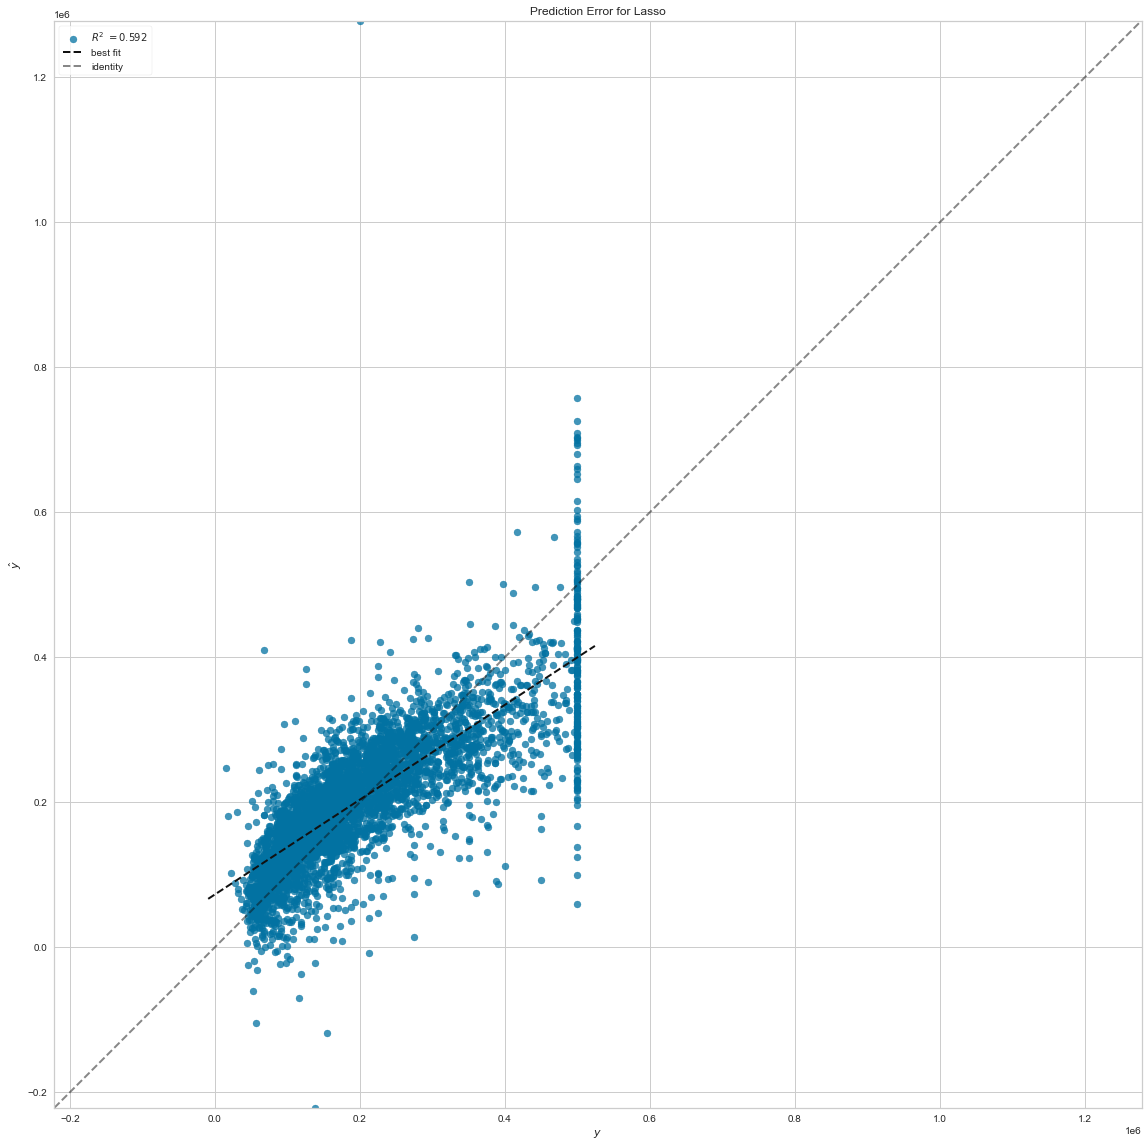

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [36]:
fig = plt.figure(figsize=(25,20))
visualizer.fit(X_train_sd, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_sd, Y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [37]:
#linreg.score(Y_test)
print('Linear Regression model score is :{}'.format((linreg.score(X_test_sd,Y_test)*100)))

Linear Regression model score is :59.18377092183875


In [38]:
# Computing RMSE

from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(Y_test, y_pred)
print('RMSE of Linear Regression model is:{}'.format(mean_squared_error(Y_test, y_pred)))

RMSE of Linear Regression model is:5348595304.195979


### 7. Perform Decision Tree Regression 

In [39]:
from sklearn.tree import DecisionTreeRegressor

# create a model object
dt_regressor = DecisionTreeRegressor(max_depth=9) 
# fit the model 
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=9)

In [40]:
y_pred = dt_regressor.predict(X_test)
y_pred

array([ 70465.34198473,  75598.79518072, 487159.52941176, ...,
       488611.25      ,  75598.79518072, 158790.07936508])

In [41]:
dt_comparison_df = pd.DataFrame({'y_pred':y_pred, 'y_actual':Y_test})
dt_comparison_df

,y_pred,y_actual
0,70465.341985,47700
1,75598.795181,45800
2,487159.529412,500001
3,232675.000000,218600
4,207638.428571,278000
...,...,...
4123,201109.677419,263300
4124,176967.224066,266800
4125,488611.250000,500001
4126,75598.795181,72300


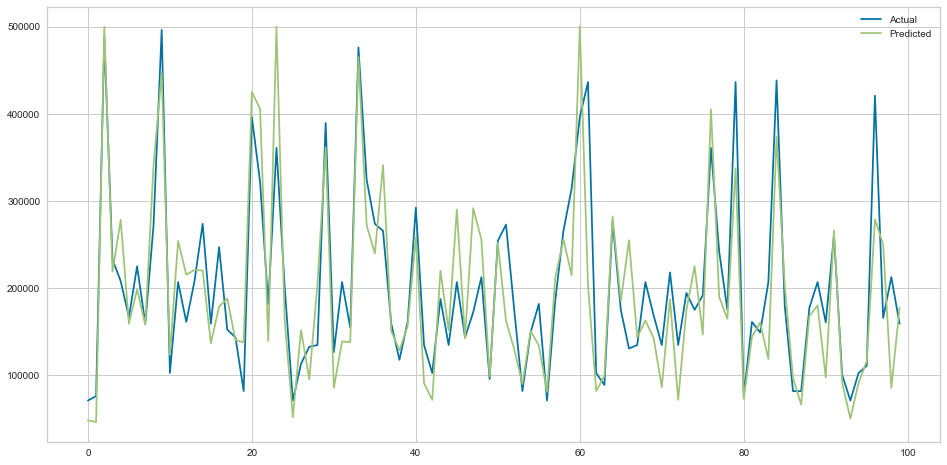

In [42]:
fig= plt.figure(figsize=(16,8))
dt_comparison_df = dt_comparison_df.reset_index()
dt_comparison_df = dt_comparison_df.drop(['index'],axis=1)
plt.plot(dt_comparison_df[:100])
plt.legend(['Actual','Predicted'])

In [43]:
#DT.score(Y_test)
print('Decision tree model score is :{}'.format((dt_regressor.score(X_test,Y_test)*100)))

Decision tree model score is :68.56525787180863


In [44]:
# Computing RMSE

from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(Y_test, y_pred)
print('RMSE of Decision Tree model is:{}'.format(mean_squared_error(Y_test, y_pred)))

RMSE of Decision Tree model is:4119236831.346943


### 8. Perform Random Forest Regression :

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
# create a model object
rf_regression = RandomForestRegressor(30) 
# fit the model 
rf_regression.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=30)

In [47]:
y_pred = rf_regression.predict(X_test)
y_pred

array([ 58989.83333333,  71533.33333333, 423390.3       , ...,
       486094.13333333,  70430.        , 152683.33333333])

In [48]:
rfr_comparison_df = pd.DataFrame({'y_pred':y_pred, 'y_actual':Y_test})
rfr_comparison_df

,y_pred,y_actual
0,58989.833333,47700
1,71533.333333,45800
2,423390.300000,500001
3,248553.333333,218600
4,227900.000000,278000
...,...,...
4123,219300.000000,263300
4124,192043.333333,266800
4125,486094.133333,500001
4126,70430.000000,72300


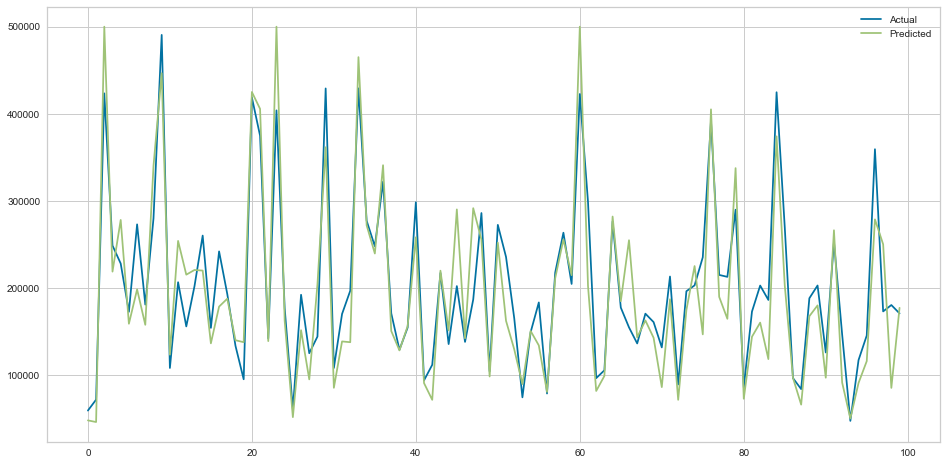

In [49]:
fig= plt.figure(figsize=(16,8))
rfr_comparison_df = rfr_comparison_df.reset_index()
rfr_comparison_df = rfr_comparison_df.drop(['index'],axis=1)
plt.plot(rfr_comparison_df[:100])
plt.legend(['Actual','Predicted'])

In [50]:
#RFR.score(Y_test)
print('RFR model score is :{}'.format((dt_regressor.score(X_test,Y_test)*100)))

RFR model score is :68.56525787180863


In [51]:
# Computing RMSE

from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(Y_test, y_pred)
print('RMSE of RFR model is:{}'.format(mean_squared_error(Y_test, y_pred)))

RMSE of RFR model is:2590197379.6580687


### Price Prediction with Deep Learning Model- ANN

In [52]:
# Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers

In [53]:
# Checking the tensorflow libraries  
print(tf.__version__)

2.10.0


In [54]:
model = Sequential()

#Input Layer
model.add(Dense(X_features.shape[1], activation='relu', input_dim = X_features.shape[1]))

#Hidden Layer
model.add(Dense(512,kernel_initializer='normal', activation='relu'))
model.add(Dense(512,kernel_initializer='normal', activation='relu'))
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
model.add(Dense(128,kernel_initializer='normal', activation='relu'))
model.add(Dense(64,kernel_initializer='normal', activation='relu'))
model.add(Dense(32,kernel_initializer='normal', activation='relu'))
#Output Layer
model.add(Dense(1,kernel_initializer='normal', activation = 'relu'))

In [55]:
X_features.shape[1]

12

In [56]:
#Compile the network 

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 512)               6656      
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [57]:
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
1652/1652 [==============================] - 7s 4ms/step - loss: 18443433984.0000 - mse: 18443433984.0000 - mae: 98995.0391
Epoch 2/10
1652/1652 [==============================] - 6s 4ms/step - loss: 10932985856.0000 - mse: 10932985856.0000 - mae: 81584.4062
Epoch 3/10
1652/1652 [==============================] - 6s 4ms/step - loss: 9078622208.0000 - mse: 9078622208.0000 - mae: 74183.7656
Epoch 4/10
1652/1652 [==============================] - 6s 4ms/step - loss: 8257145344.0000 - mse: 8257145344.0000 - mae: 70311.6953
Epoch 5/10
1652/1652 [==============================] - 6s 4ms/step - loss: 7699190272.0000 - mse: 7699190272.0000 - mae: 67561.8672
Epoch 6/10
1652/1652 [==============================] - 6s 4ms/step - loss: 7476926976.0000 - mse: 7476926976.0000 - mae: 66357.6484
Epoch 7/10
1652/1652 [==============================] - 6s 4ms/step - loss: 7223075328.0000 - mse: 7223075328.0000 - mae: 65123.6914
Epoch 8/10
1652/1652 [==============================] - 6s 4ms/st

In [58]:
y_pred = model.predict(X_test)

129/129 [==============================] - 1s 4ms/step


In [59]:
ann_comparison_df = pd.DataFrame({'y_pred':y_pred.ravel(), 'y_actual':Y_test})
ann_comparison_df

,y_pred,y_actual
0,130094.250000,47700
1,158191.406250,45800
2,587652.750000,500001
3,166863.593750,218600
4,144053.109375,278000
...,...,...
4123,205279.906250,263300
4124,167300.890625,266800
4125,433494.406250,500001
4126,153057.843750,72300


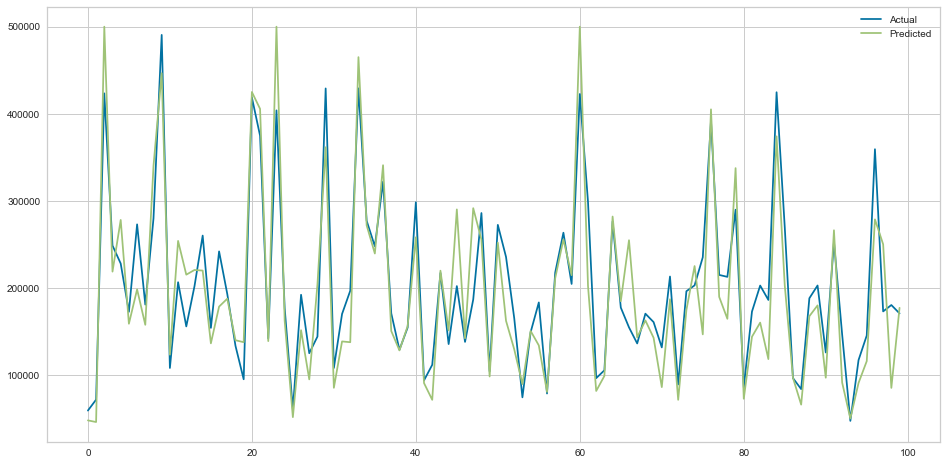

In [60]:
fig= plt.figure(figsize=(16,8))
ann_comparison_df = ann_comparison_df.reset_index()
ann_comparison_df = ann_comparison_df.drop(['index'],axis=1)
plt.plot(rfr_comparison_df[:100])
plt.legend(['Actual','Predicted'])

In [61]:
model.evaluate(X_test, Y_test)

129/129 [==============================] - 1s 3ms/step - loss: 6509406208.0000 - mse: 6509406208.0000 - mae: 59028.2500


[6509406208.0, 6509406208.0, 59028.25]